In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
import pandas as pd
import json
from sqlalchemy import create_engine
#import pymysql
import warnings
warnings.filterwarnings('ignore')

In [61]:
db_conn = mysql.connector.connect(host="localhost", user="root", passwd="1234",  database='cs670research')
db_cursor = db_conn.cursor(buffered=True)
insert_query = "SELECT * FROM research_exploration_label1;"
pandasDf_noisy =  pd.read_sql(insert_query, con=db_conn)
pandasDf_noisy['score_1']=pandasDf_noisy['score_1'].astype('float64')
pandasDf_noisy['score_2']=pandasDf_noisy['score_2'].astype('float64')
pandasDf_noisy['score_3']=pandasDf_noisy['score_3'].astype('float64')
pandasDf_noisy['time']=pandasDf_noisy['time'].astype('float64')
pandasDf_noisy.loc[pandasDf_noisy.label == 'aws-noisy', 'label'] = 'aws'
pandasDf_noisy.loc[pandasDf_noisy.label == 'azure-noisy', 'label'] = 'azure'
pandasDf_noisy.loc[pandasDf_noisy.label == 'gc-noisy', 'label'] = 'gc'
pandasDf_noisy['type'] = 'Noisy'

In [62]:
db_conn = mysql.connector.connect(host="localhost", user="root", passwd="1234",  database='cs670research')
db_cursor = db_conn.cursor(buffered=True)
insert_query = "SELECT * FROM research_exploration_label WHERE label IN ('aws', 'gc', 'azure')"
pandasDf_original =  pd.read_sql(insert_query, con=db_conn)
pandasDf_original['score_1']=pandasDf_original['score_1'].astype('float64')
pandasDf_original['score_2']=pandasDf_original['score_2'].astype('float64')
pandasDf_original['score_3']=pandasDf_original['score_3'].astype('float64')
pandasDf_original['time']=pandasDf_original['time'].astype('float64')
pandasDf_original['type'] = 'Original'

In [63]:
pd_merged = pd.concat([pandasDf_original, pandasDf_noisy])

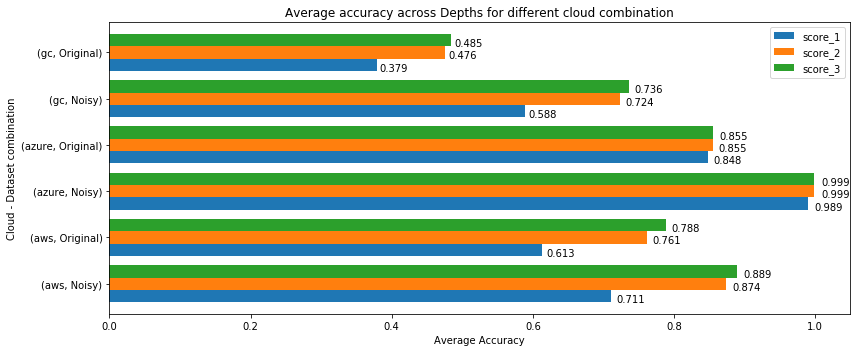

In [74]:
# Average Accuracy across Depths

pd_merged_pivot = pd.pivot_table(pd_merged, index=['label', 'type'], values=['score_1', 'score_2', 'score_3'], aggfunc='mean')

ax = pd_merged_pivot.plot(kind='barh', figsize=(12, 5), width=.8)
ax.legend(loc='best')
ax.set_ylabel('Cloud - Dataset combination')
ax.set_xlabel('Average Accuracy')
ax.set_title('Average accuracy across Depths for different cloud combination')
plt.tight_layout()
for p in ax.patches:
    if round(p.get_width(), 3) == 0.0:
        continue
    ax.text(p.get_width()*1.01, p.get_y()*1, str(round(p.get_width(), 3)))

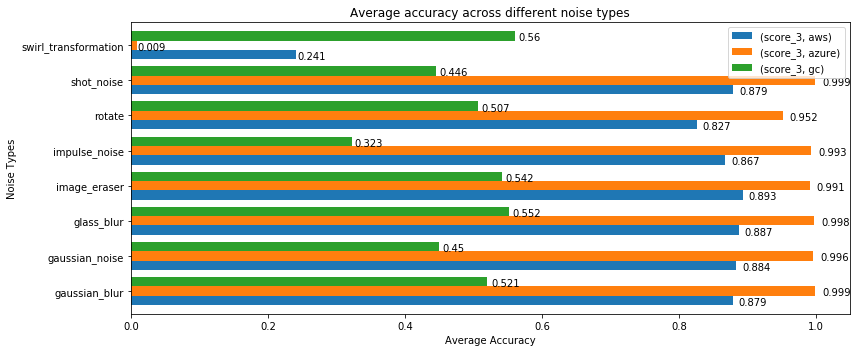

In [76]:
# Average Score across noise_type and cloud (score - 3)
pd_merged_pivot = pd.pivot_table(pandasDf_noisy, index=['noise_type'], columns=['label'], values=['score_3'], aggfunc='mean')

ax = pd_merged_pivot.plot(kind='barh', figsize=(12, 5), width=.8)
ax.legend(loc='best')
ax.set_ylabel('Noise Types')
ax.set_xlabel('Average Accuracy')
ax.set_title('Average accuracy across different noise types')
plt.tight_layout()
for p in ax.patches:
    if round(p.get_width(), 3) == 0.0:
        continue
    ax.text(p.get_width()*1.01, p.get_y()*1, str(round(p.get_width(), 3)))

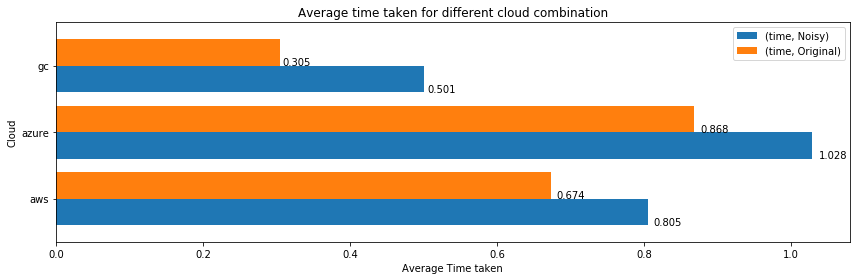

In [71]:
# Average Time

db_conn = mysql.connector.connect(host="localhost", user="root", passwd="1234",  database='cs670research')
db_cursor = db_conn.cursor(buffered=True)
insert_query = "SELECT * FROM research_exploration_label WHERE label IN ('aws', 'gc', 'azure')"
pandasDf_original =  pd.read_sql(insert_query, con=db_conn)
pandasDf_original['score_1']=pandasDf_original['score_1'].astype('float64')
pandasDf_original['score_2']=pandasDf_original['score_2'].astype('float64')
pandasDf_original['score_3']=pandasDf_original['score_3'].astype('float64')
pandasDf_original['time']=pandasDf_original['time'].astype('float64')
pandasDf_original['type'] = 'Original'

db_conn = mysql.connector.connect(host="localhost", user="root", passwd="1234",  database='cs670research')
db_cursor = db_conn.cursor(buffered=True)
insert_query = "SELECT * FROM research_exploration_label1;"
pandasDf_noisy =  pd.read_sql(insert_query, con=db_conn)
pandasDf_noisy['score_1']=pandasDf_noisy['score_1'].astype('float64')
pandasDf_noisy['score_2']=pandasDf_noisy['score_2'].astype('float64')
pandasDf_noisy['score_3']=pandasDf_noisy['score_3'].astype('float64')
pandasDf_noisy['time']=pandasDf_noisy['time'].astype('float64')
pandasDf_noisy.loc[pandasDf_noisy.label == 'aws-noisy', 'label'] = 'aws'
pandasDf_noisy.loc[pandasDf_noisy.label == 'azure-noisy', 'label'] = 'azure'
pandasDf_noisy.loc[pandasDf_noisy.label == 'gc-noisy', 'label'] = 'gc'
pandasDf_noisy['type'] = 'Noisy'

pd_merged = pd.concat([pandasDf_original, pandasDf_noisy])
pd_merged_pivot = pd.pivot_table(pd_merged, index=['label'], columns=['type'], values=['time'], aggfunc='mean')

ax = pd_merged_pivot.plot(kind='barh', figsize=(12, 4), width=.8)
ax.legend(loc='best')
ax.set_ylabel('Cloud')
ax.set_xlabel('Average Time taken')
ax.set_title('Average time taken for different cloud combination')
plt.tight_layout()
for p in ax.patches:
    if round(p.get_width(), 3) == 0.0:
        continue
    ax.text(p.get_width()*1.01, p.get_y()*1, str(round(p.get_width(), 3)))